## Reinforcement Learning - Tetris

The current project is a reinforcement learning agent that learns to play Tetris. It was developed for the Reinformcement Learning course at FGV-EMAp. The students are:

- Bruno Lunardon
- George Dutra
- Zuilho Segundo

We choosed 

In [27]:
#import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections import deque
from IPython.display import clear_output
from tetris import Tetris, get_args
import cv2
import argparse
import sys

In [2]:
env = Tetris(width=10, height=20, block_size=30)
env.reset()


c:\Users\lunar\OneDrive\Documentos\GitHub\RL-Tetris\tetris.py:88: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem . (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:84.)
  return torch.FloatTensor([lines_cleared, holes, bumpiness, height])


tensor([0., 0., 0., 0.])

In [28]:

def get_args():
    parser = argparse.ArgumentParser(
        """Implementation of Deep Q Network to play Tetris""")

    parser.add_argument("--width", type=int, default=10, help="The common width for all images")
    parser.add_argument("--height", type=int, default=20, help="The common height for all images")
    parser.add_argument("--block_size", type=int, default=30, help="Size of a block")
    parser.add_argument("--fps", type=int, default=10, help="frames per second")
    parser.add_argument("--saved_path", type=str, default="trained_models")
    parser.add_argument("--output", type=str, default="output.mp4")

    #args, unknown = parser.parse_args(args=)
    #return args

def test_random(opt):
    env = Tetris(width=opt["width"], height=opt["height"], block_size=opt["block_size"])
    env.reset()

    out = cv2.VideoWriter(opt["output"], cv2.VideoWriter_fourcc(*"MJPG"), opt["fps"],
                          (int(1.5*opt["width"]*opt["block_size"]), opt["height"]*opt["block_size"]))

    while True:
        next_steps = env.get_next_states_v2()
        next_actions, _ = zip(*next_steps.items())

        import torch

        # Assuming _ is your tuple of tensors
        tensors = _

        # Stack all tensors to form a 2D tensor
        stacked_tensors = torch.stack(tensors)

        # Extract second entries of all tensors into a tensor
        second_entries = stacked_tensors[:, 1]

        # Find the minimum of the second entries
        min_val = torch.min(second_entries)

        # Find the index of the tensor(s) with the minimum second entry
        indices = (second_entries == min_val).nonzero(as_tuple=True)[0]

        random_index = random.randint(0, len(indices)-1)

        # Using advanced indexing to get the tensor(s) with the minimum second entry
        #filtered_tensors = stacked_tensors[indices].unbind(dim=0)


        # Escolhendo uma ação aleatória
        #action = random.choice(next_actions)

        #print(next_actions[indices[0]])

        _, done = env.step(next_actions[indices[random_index]], render=True, video=out)

        
        if done:
            out.release()
            cv2.destroyAllWindows()
            break
        

opt = {"width": 10, "height": 20, "block_size": 30, "fps": 30, "saved_path": "trained_models", "output": "output.mp4"}
test_random(opt)


AttributeError: 'Tetris' object has no attribute 'get_next_states_v2'

In [8]:
out = cv2.VideoWriter("output.mp4", cv2.VideoWriter_fourcc(*"MJPG"), 300,
                          (int(1.5*10*30), 20*30))
while True:
    next_steps = env.get_next_states()
    next_actions, next_states = zip(*next_steps.items())
    next_states = torch.stack(next_states)
    if torch.cuda.is_available():
        next_states = next_states.cuda()
    index = random.randint(0, len(next_states) - 1)
    action = next_actions[index]
    _, done = env.step(action, render=True, video=out)

    if done:
        out.release()
        break


: 

In [40]:
actions = []
observations = []
rewards = []
infos = []
terminateds = []
truncateds = []

env = gym.make("ALE/Tetris-ram-v5", render_mode="human", repeat_action_probability=0.1, full_action_space=True, obs_type="grayscale")
observation, info = env.reset()
for _ in range(20):
   action = env.action_space.sample()  # this is where you would insert your policy
   observation, reward, terminated, truncated, info = env.step(action)

   actions.append(action)
   observations.append(observation)
   rewards.append(reward)
   infos.append(info)
   terminateds.append(terminated)
   truncateds.append(truncated)

   if terminated or truncated:
      observation, info = env.reset()

env.close()

c:\Users\segun\.conda\envs\rl\Lib\site-packages\gymnasium\utils\passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (210, 160)
  logger.warn(


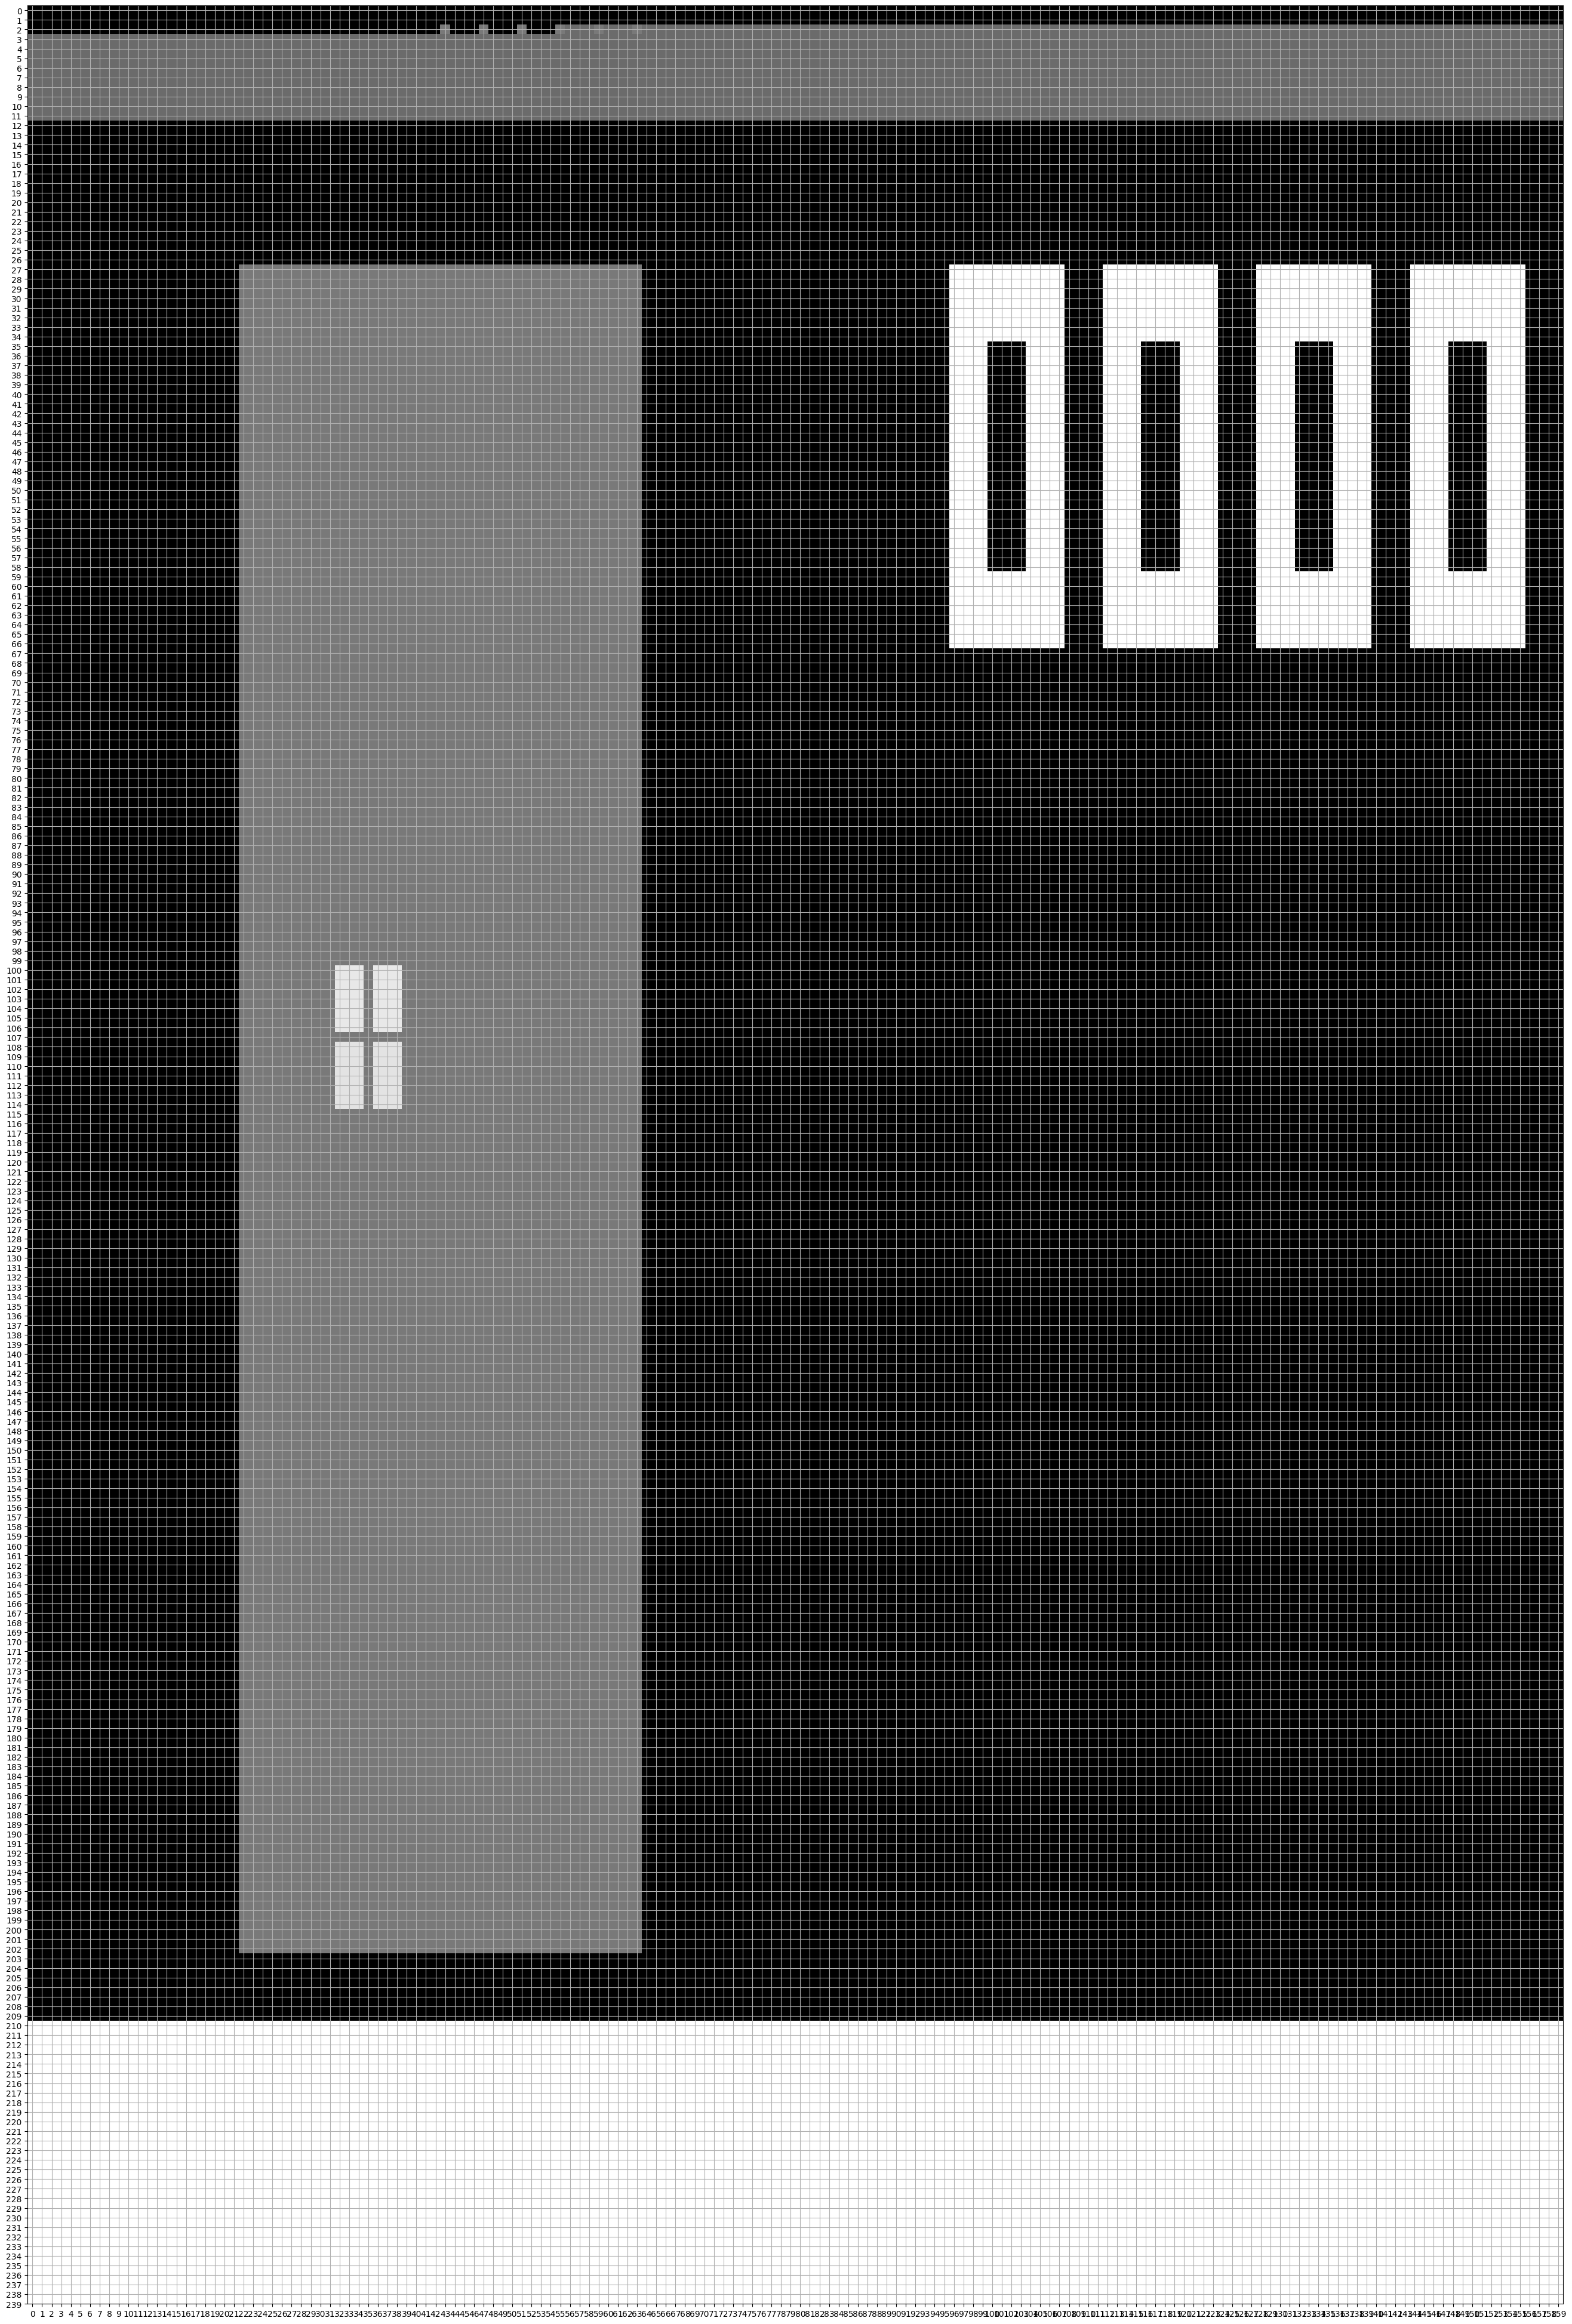

In [31]:
plt.figure(figsize=(50, 50))
plt.imshow(np.array(observations[-1]), cmap="gray")
plt.xticks([x for x in range(160)]), plt.yticks([y for y in range(240)])
plt.grid(True)


In [22]:
175 (27, 202) #y

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 98 98 98]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
